<a href="https://colab.research.google.com/github/Shrey-Viradiya/DiveDeep/blob/master/Prac3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 3

In [ ]:
!nvidia-smi

Mon Jan 25 09:09:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Shrey Viradiya
### 18BCE259

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import sklearn.metrics

In [ ]:
def plot_image(image):
    plt.imshow(image.squeeze(), cmap=plt.cm.binary, interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.squeeze(), interpolation="nearest")
    plt.axis("off")

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# train_labels = tf.keras.utils.to_categorical(train_labels)
# test_labels = tf.keras.utils.to_categorical(test_labels)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
valid_images, valid_labels, test_images, test_labels = test_images[0:1000], test_labels[0:1000], test_images[1000:], test_labels[1000:]

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_images.shape

(9000, 28, 28, 1)

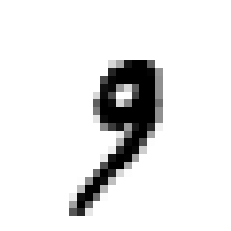

In [ ]:
plot_image(test_images[0])

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

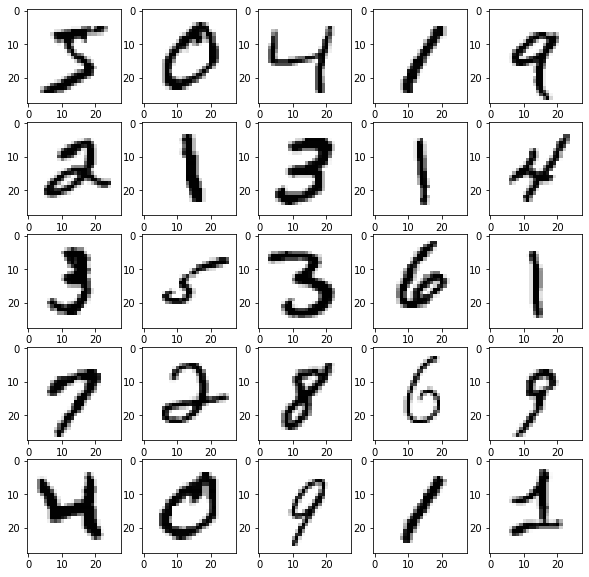

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(train_images[i].squeeze(), cmap=plt.cm.binary)
plt.show()

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10 , activation='softmax'),
])
model_1.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
history = model_1.fit(train_images, train_labels, epochs=30, validation_data=(valid_images, valid_labels), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)])

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4308 - accuracy: 0.8808 - val_loss: 16.7434 - val_accuracy: 0.9580
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1174 - accuracy: 0.9659 - val_loss: 12.1694 - val_accuracy: 0.9730
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0759 - accuracy: 0.9763 - val_loss: 12.2866 - val_accuracy: 0.9770
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0560 - accuracy: 0.9829 - val_loss: 9.3718 - val_accuracy: 0.9760
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0414 - accuracy: 0.9878 - val_loss: 9.0725 - val_accuracy: 0.9810
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0330 - accuracy: 0.9900 - val_loss: 13.8729 - val_accuracy: 0.9780
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0253 - accuracy: 0.9926 - val_loss: 11.4178 - val_accu

In [ ]:
test_loss, test_acc = model_1.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

282/282 [==============================] - 1s 2ms/step - loss: 0.1103 - accuracy: 0.9786

Test accuracy: 0.9785555601119995


In [ ]:
predictions = tf.argmax(model_1.predict(test_images), axis=-1)

In [ ]:
print(sklearn.metrics.accuracy_score(predictions, test_labels))
print(sklearn.metrics.classification_report(predictions, test_labels))
print(sklearn.metrics.confusion_matrix(predictions, test_labels))

0.9785555555555555
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       901
           1       0.99      0.99      0.99      1013
           2       0.98      0.98      0.98       912
           3       0.98      0.97      0.97       908
           4       0.98      0.97      0.98       882
           5       0.97      0.98      0.98       800
           6       0.98      0.98      0.98       869
           7       0.97      0.98      0.98       917
           8       0.98      0.98      0.98       885
           9       0.97      0.97      0.97       913

    accuracy                           0.98      9000
   macro avg       0.98      0.98      0.98      9000
weighted avg       0.98      0.98      0.98      9000

[[ 885    0    3    0    1    3    3    1    3    2]
 [   1 1002    1    1    0    0    3    3    0    2]
 [   1    1  894    5    1    0    0    9    1    0]
 [   0    1    5  882    0    7    1    2    7    3]
 [   1    

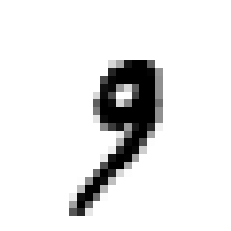

In [ ]:
plot_image(test_images[0])

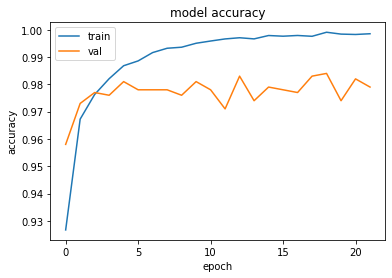

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
inp = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, (3,3), activation = 'relu')(inp)
x = tf.keras.layers.MaxPool2D((2,2))(x)
x = tf.keras.layers.Conv2D(64, (3,3), activation = 'relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
out = tf.keras.layers.Dense(10 , activation='softmax')(x)

model_2 = tf.keras.Model(inputs = [inp], outputs = [out])

model_2.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               991360    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290  

In [ ]:
history = model_2.fit(train_images, train_labels, epochs=30, validation_data=(valid_images, valid_labels), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)])

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2337 - accuracy: 0.9298 - val_loss: 7.4303 - val_accuracy: 0.9810
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0369 - accuracy: 0.9887 - val_loss: 4.3652 - val_accuracy: 0.9880
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0209 - accuracy: 0.9929 - val_loss: 4.4828 - val_accuracy: 0.9910
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0127 - accuracy: 0.9961 - val_loss: 12.6012 - val_accuracy: 0.9810
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 11.1586 - val_accuracy: 0.9880
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0096 - accuracy: 0.9966 - val_loss: 14.9552 - val_accuracy: 0.9850
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0062 - accuracy: 0.9979 - val_loss: 19.2896 - val_accur

In [ ]:
test_loss, test_acc = model_2.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

282/282 [==============================] - 1s 2ms/step - loss: 0.0579 - accuracy: 0.9916

Test accuracy: 0.9915555715560913


In [ ]:
predictions = tf.argmax(model_2.predict(test_images), axis=-1)

In [ ]:
print(sklearn.metrics.accuracy_score(predictions, test_labels))
print(sklearn.metrics.classification_report(predictions, test_labels))
print(sklearn.metrics.confusion_matrix(predictions, test_labels))

0.9915555555555555
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       904
           1       1.00      0.99      1.00      1011
           2       0.99      0.99      0.99       910
           3       0.99      0.99      0.99       906
           4       0.99      0.99      0.99       875
           5       0.99      0.99      0.99       805
           6       0.99      1.00      0.99       867
           7       0.99      0.99      0.99       931
           8       0.99      0.99      0.99       881
           9       0.99      0.99      0.99       910

    accuracy                           0.99      9000
   macro avg       0.99      0.99      0.99      9000
weighted avg       0.99      0.99      0.99      9000

[[ 893    1    2    0    0    2    3    0    3    0]
 [   0 1005    0    0    0    0    1    4    1    0]
 [   0    0  904    1    0    0    1    3    0    1]
 [   0    0    2  898    0    5    0    0    1    0]
 [   0    

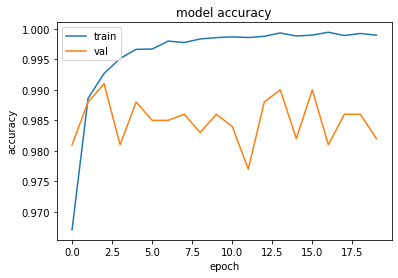

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()